A Raihan Bhuiyan <br/>
2130846 <br/>
Submission 1 <br/>

##### We will discuss and implement some topic from lecture 2

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_names = ["sunny.jpg", "afternoon.jpg", "dark_1.jpg"]

##### Piecewise Linear Transformations

float64


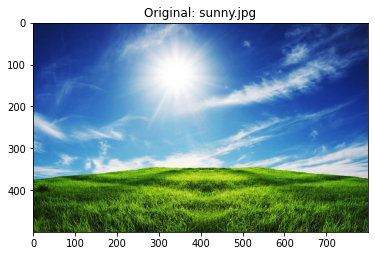

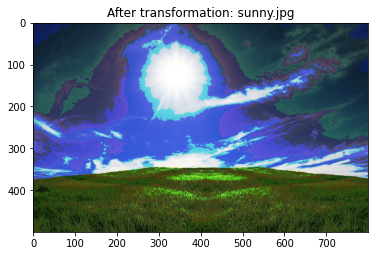

In [9]:
original_img = cv2.imread(img_names[0])
img = original_img/255
img = 0.5 * img
img[img<(50/255)] = 2 * img[img<(50/255)]
img[img>(100/255)] = 2 * img[img>(100/255)]

# cv2 only works with float32, this happened because of the 
# arithmatic operation
# we use astype to fix this problem later
print(img.dtype)

plt.figure()
plt.title(f"Original: {img_names[0]}")
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

plt.figure()
plt.title(f"After transformation: {img_names[0]}")
plt.imshow(cv2.cvtColor(img.astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

##### Neighborhood operation

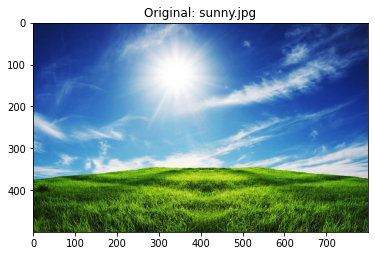

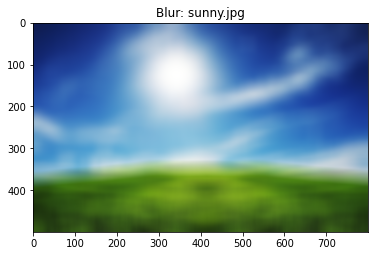

In [10]:
# simple blur
def blur(image_name):
    img = cv2.imread(image_name, cv2.IMREAD_COLOR)
    blur = cv2.blur(img, (40, 40))
    plt.figure()
    plt.title(f"Original: {image_name}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.imshow(img)
    
    plt.figure()
    plt.title(f"Blur: {image_name}")
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
    # plt.imshow(blur)

    plt.show()
    
blur(img_names[0])

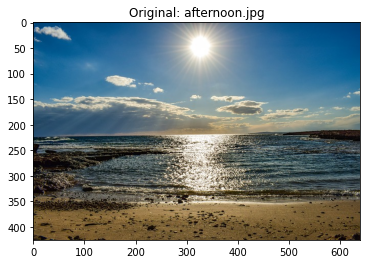

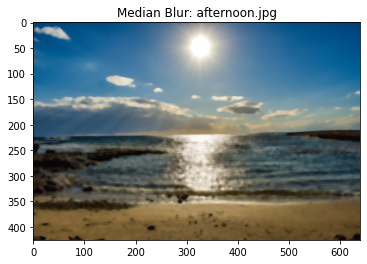

In [11]:
# Median blur
def mediann_blur(image_name):
    img = cv2.imread(image_name, cv2.IMREAD_COLOR)
    blur = cv2.medianBlur(img, 7)
    plt.figure()
    plt.title(f"Original: {image_name}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.imshow(img)
    
    plt.figure()
    plt.title(f"Median Blur: {image_name}")
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
    # plt.imshow(blur)

    plt.show()
    
mediann_blur(img_names[1])

#### Histogram processing

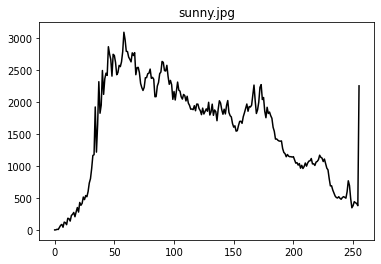

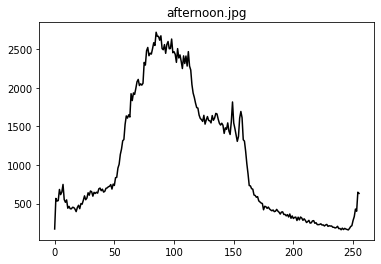

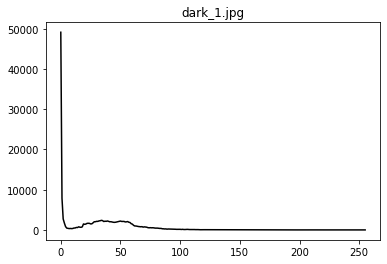

In [12]:
def show_histogram_grayscale(img_names):
    for img_name in img_names:
        image = cv2.imread(img_name)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        plt.figure()
        plt.title(f"{img_name}")
        plt.plot(histogram, color='k')

    plt.show()
    
show_histogram_grayscale(img_names)

We conclude that, because of low intensity of dark image, there are no spike. The sunny image has the most spike and afternoon has second most spikes.

#### Now we again plot the histogram but this time we do as Color histogram for the same image

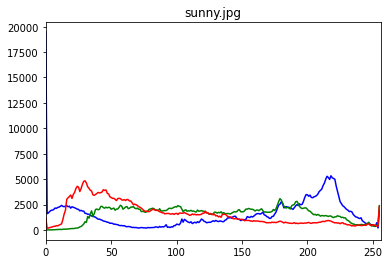

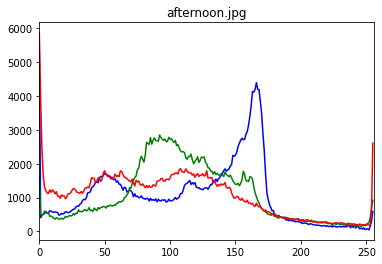

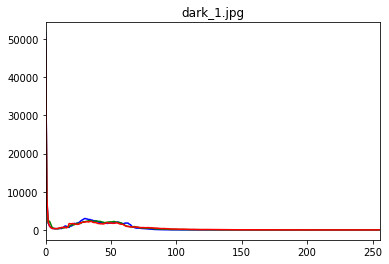

In [13]:
def show_histogram_color(img_names):
    for img_name in img_names:
        image = cv2.imread(img_name)
        plt.figure()
        plt.title(f"{img_name}")
        for i, col in enumerate(['b', 'g', 'r']):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color = col)
            plt.xlim([0, 256])
    
    plt.show()
    
show_histogram_color(img_names)

#### We conslude that the afternoon picture has more blue comparing others, the dark has very low level of intensity as expected.

#### Histogram equalization

With this technique, we can adjust the contrast of an image. This technique is very useful in medical or satellite image.

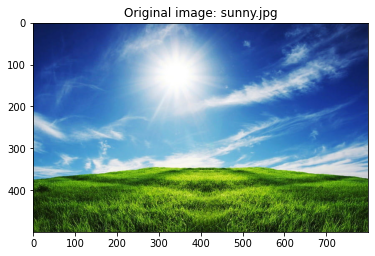

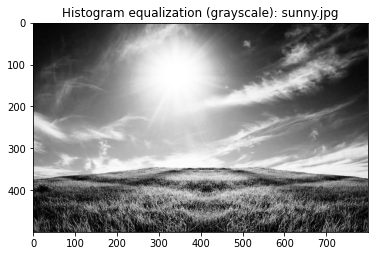

In [14]:
def grayscale_equalized(image_name):
    image = cv2.imread(image_name)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    eq_grayscale_image = cv2.equalizeHist(grayscale_image)
    plt.figure(f"Original image: {image_name}")
    plt.title(f"Original image: {image_name}")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.figure(f"Histogram equalization (grayscale): {image_name}")
    plt.title(f"Histogram equalization (grayscale): {image_name}")
    plt.imshow(eq_grayscale_image, cmap='gray')
    plt.show()
    
grayscale_equalized(img_names[0])
